# Clean data & Categorize expenses into appropriate category


# -----------------------------------------------------------------------------------------------------------------

## 1.Exploring the dataset and fixing the data structure and presentation

##  2.Handling all missing values and checking for incorrect data entries.
 
## 3. Finding a way to categorize expenses into appropriate category like Food, Travel, Shopping etc.

## 4. Output the updated data into CSV so that queries like below can be answered:

### - What was my food bill last month?
### - Compare my monthly travel over past three month
### - Am I an impulsive shopper?

### Loading Required Packages

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re
from matplotlib.pyplot import xticks
%matplotlib inline

# Supress Warnings
import warnings
warnings.filterwarnings('ignore')
pd.set_option('display.max_columns', 100)

### Reading(Loading) Datset

In [2]:
df = pd.read_csv('OneBanc-DataScienceCleanStatement.csv' , error_bad_lines=False)

### View Loaded datset sample

In [3]:
df.head(10)

,Date,Description,InternationTransactionAmount,Category,Amount,TransactionUserName,TransactionType,IsoCurrency,Locality,City,State,Country,Unnamed: 12
0,12/12/2019,THE ROOM GURGAON ...,0,Video game,-127,VIBHORE GOYAL,Domestic,INR,Central Park II,Gurugram,Haryana,India,NaN
1,12/12/2019,CUT AND STYLEGURGAON ...,0,Occupation,-499,JASJIT KAUR,Domestic,INR,Sector 4,Gurugram,Haryana,India,NaN
2,12/12/2019,MUMUSOGURGAON ...,0,,-388,JASJIT KAUR,Domestic,INR,Sector 49,Gurugram,Haryana,India,NaN
3,12/12/2019,THE ROOM GURGAON ...,0,Video game,-108,VIBHORE GOYAL,Domestic,INR,Central Park II,Gurugram,Haryana,India,NaN
4,12/12/2019,THE ROOM GURGAON ...,0,Video game,-50,VIBHORE GOYAL,Domestic,INR,Central Park II,Gurugram,Haryana,India,NaN
5,13-12-2019,JAIPUR SPACEJAIPUR ...,0,City in India,-360,JASJIT KAUR,Domestic,INR,Sector 9,Jaipur,Rajasthan,India,NaN
6,13-12-2019,CAFE COFFEE DAYHIGHWAY KI ...,0,Cafe company,-286,JASJIT KAUR,Domestic,INR,NaN,NaN,NaN,NaN,NaN
7,14-12-2019,CAFE COFFEE DAYALANKAR PL ...,0,Cafe company,-786,JASJIT KAUR,Domestic,INR,NaN,NaN,NaN,NaN,NaN
8,15-12-2019,LIFE STYLE INTERNATIONAJAIPUR ...,0,,-1698,VIBHORE GOYAL,Domestic,INR,Durgadas Colony,Jaipur,Rajasthan,India,NaN
9,15-12-2019,NEW U 47 JAIPUR ...,0,New York City borough,-1890,VIBHORE GOYAL,Domestic,INR,Jaipur,Jaipur,Rajasthan,India,NaN


### Checking No of rows and columns present in the dataset

In [4]:
print("The no. of columns present in the dataset :  ", len(df.columns))
print("The no. of rows present in the dataset :  ", len(df))

The no. of columns present in the dataset :   13
The no. of rows present in the dataset :   1470


### Checking Loaded Dataset 

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 13 columns):
 #   Column                                                               Non-Null Count  Dtype 
---  ------                                                               --------------  ----- 
 0   Date                                                                 1470 non-null   object
 1   Description                                                          1470 non-null   object
 2   InternationTransactionAmount                                         1470 non-null   object
 3     Category                                                           1470 non-null   object
 4     Amount                                                             1470 non-null   object
 5   TransactionUserName                                                  1470 non-null   object
 6    TransactionType                                                     1470 non-null   object
 7   IsoCurrency    

In [6]:
df.describe()

,Date,Description,InternationTransactionAmount,Category,Amount,TransactionUserName,TransactionType,IsoCurrency,Locality,City,State,Country,Unnamed: 12
count,1470,1470,1470,1470,1470,1470,1470,1470,1302,1270,1245,1307,4
unique,408,495,35,153,991,7,4,5,186,41,21,7,1
top,1/8/2019,THE ROOM GURGAON ...,0,,-50,JASJIT KAUR,Domestic,INR,Central Park II,Gurugram,Haryana,India,India
freq,13,122,1436,508,25,755,1433,1433,227,930,935,1260,4


### Checking Duplicated records

In [7]:
df[df.duplicated(keep=False)]

,Date,Description,InternationTransactionAmount,Category,Amount,TransactionUserName,TransactionType,IsoCurrency,Locality,City,State,Country,Unnamed: 12
49,23-12-2019,AMAZON SELLER SERVICES MUMBAI ...,0,E-commerce company,-13798,VIBHORE GOYAL,Domestic,INR,New Mhada Colony,Mumbai,Maharashtra,India,NaN
52,23-12-2019,AMAZON SELLER SERVICES MUMBAI ...,0,E-commerce company,-13798,VIBHORE GOYAL,Domestic,INR,New Mhada Colony,Mumbai,Maharashtra,India,NaN
126,17-01-2019,BARISTA COFFEEGURGAON ...,0,,-137,JASJIT KAUR,Domestic,INR,Maruti Housing Colony,Gurugram,Haryana,India,NaN
127,17-01-2019,BARISTA COFFEEGURGAON ...,0,,-137,JASJIT KAUR,Domestic,INR,Maruti Housing Colony,Gurugram,Haryana,India,NaN
235,19-01-2020,THE ROOMGURGAON ...,0,,-50,INDU GOYAL,Domestic,INR,Central Park II,Gurugram,Haryana,India,NaN
236,19-01-2020,THE ROOMGURGAON ...,0,,-50,INDU GOYAL,Domestic,INR,Central Park II,Gurugram,Haryana,India,NaN
280,30-01-2020,PAYTMNOIDA ...,0,,-5000,VIBHORE GOYAL,Domestic,INR,F Block,Noida,Uttar Pradesh,India,NaN
281,30-01-2020,PAYTMNOIDA ...,0,,-5000,VIBHORE GOYAL,Domestic,INR,F Block,Noida,Uttar Pradesh,India,NaN
364,17-02-2019,INDIAN RAILWAY CATERINGNEW DELHI ...,0,Railway company,-5964.04,VIBHORE GOYAL,Domestic,INR,Janpath,New Delhi,Delhi,India,NaN
365,17-02-2019,INDIAN RAILWAY CATERINGNEW DELHI ...,0,Railway company,-5964.04,VIBHORE GOYAL,Domestic,INR,Janpath,New Delhi,Delhi,India,NaN


### Checking count of Duplicated records

In [8]:
print(df.duplicated().sum())

6


### Removing Duplicated records

In [9]:
df = df.drop_duplicates()

### Checking shape of the datset after removal of duplicates

In [10]:
print("The no. of columns present in the dataset :  ", len(df.columns))
print("The no. of rows present in the dataset :  ", len(df))

The no. of columns present in the dataset :   13
The no. of rows present in the dataset :   1464


### Checking  the count of Unique Value in each Column

In [11]:
df.nunique()

Date                                                                   408
Description                                                            495
InternationTransactionAmount                                            35
  Category                                                             153
  Amount                                                               991
TransactionUserName                                                      7
 TransactionType                                                         4
IsoCurrency                                                              5
Locality                                                               186
City                                                                    41
State                                                                   21
Country                                                                  7
Unnamed: 12                                                              1
dtype: int64

### Checking the count Null values

In [12]:
df.isnull().sum()

Date                                                                      0
Description                                                               0
InternationTransactionAmount                                              0
  Category                                                                0
  Amount                                                                  0
TransactionUserName                                                       0
 TransactionType                                                          0
IsoCurrency                                                               0
Locality                                                                168
City                                                                    200
State                                                                   225
Country                                                                 163
Unnamed: 12                                                            1460
dtype: int64

### Seems Unnamed: 12 column has very few data points. Let's check those. 

In [13]:
first_df = df[df['Unnamed: 12'].notnull()]
first_df

,Date,Description,InternationTransactionAmount,Category,Amount,TransactionUserName,TransactionType,IsoCurrency,Locality,City,State,Country,Unnamed: 12
182,3/2/2019,RAZ*Pizza Hut,F-2/7OKH Delhi ...,0,,-438.9,VIBHORE GOYAL,Domestic,INR,NaN,NaN,Delhi,India
477,23-02-2020,THE BREWHOUSE 2 Radisson Gurugram ...,0,Theatre in Taunton,England,-2899,JASJIT KAUR,Domestic,INR,Block S,Gurugram,Haryana,India
755,4/8/2019,BREWER STREET GURGAON ...,0,Street in London,England,-2348,VIBHORE GOYAL,Domestic,INR,D1 Block,Gurugram,Haryana,India
789,14-08-2019,Jai Mahal Palace Hawa MahJAIPUR ...,0,Palace in Jaipur,India,-2391,VIBHORE GOYAL,Domestic,INR,Civil Lines,Jaipur,Rajasthan,India


### Removing the above four rows since data present is quite wrong 

In [14]:
df['Unnamed: 12'] = df['Unnamed: 12'].fillna(0)
df = df[df['Unnamed: 12'] == 0]

### Checking shape of the datset after removal of above 4 rows

In [15]:
print("The no. of columns present in the dataset :  ", len(df.columns))
print("The no. of rows present in the dataset :  ", len(df))

The no. of columns present in the dataset :   13
The no. of rows present in the dataset :   1460


In [16]:
df.nunique()

Date                                                                   408
Description                                                            491
InternationTransactionAmount                                            34
  Category                                                             149
  Amount                                                               988
TransactionUserName                                                      3
 TransactionType                                                         2
IsoCurrency                                                              4
Locality                                                               185
City                                                                    38
State                                                                   19
Country                                                                  4
Unnamed: 12                                                              1
dtype: int64

In [17]:
### Seems some of the column headers have white spaces in between them. 

### Removing white spaces from the column headers

In [18]:
df.columns = df.columns.str.replace(' ', '') 

In [19]:
df.head()

,Date,Description,InternationTransactionAmount,Category,Amount,TransactionUserName,TransactionType,IsoCurrency,Locality,City,State,Country,Unnamed:12
0,12/12/2019,THE ROOM GURGAON ...,0,Video game,-127,VIBHORE GOYAL,Domestic,INR,Central Park II,Gurugram,Haryana,India,0
1,12/12/2019,CUT AND STYLEGURGAON ...,0,Occupation,-499,JASJIT KAUR,Domestic,INR,Sector 4,Gurugram,Haryana,India,0
2,12/12/2019,MUMUSOGURGAON ...,0,,-388,JASJIT KAUR,Domestic,INR,Sector 49,Gurugram,Haryana,India,0
3,12/12/2019,THE ROOM GURGAON ...,0,Video game,-108,VIBHORE GOYAL,Domestic,INR,Central Park II,Gurugram,Haryana,India,0
4,12/12/2019,THE ROOM GURGAON ...,0,Video game,-50,VIBHORE GOYAL,Domestic,INR,Central Park II,Gurugram,Haryana,India,0


In [20]:
des_data = df['Description'].str.split('\s{2,}',expand=True) 
des_data.head()

,0,1,2,3
0,THE ROOM,GURGAON,,None
1,CUT AND STYLEGURGAON,,None,None
2,MUMUSOGURGAON,,None,None
3,THE ROOM,GURGAON,,None
4,THE ROOM,GURGAON,,None


In [21]:
des_data.columns = ['Description' , 'City2' , 'Tag3' , 'Tag4']
des_data.head()

,Description,City2,Tag3,Tag4
0,THE ROOM,GURGAON,,None
1,CUT AND STYLEGURGAON,,None,None
2,MUMUSOGURGAON,,None,None
3,THE ROOM,GURGAON,,None
4,THE ROOM,GURGAON,,None


In [22]:
des_data = des_data.drop(['Tag4', 'Tag3'], axis = 1)
des_data.head()

,Description,City2
0,THE ROOM,GURGAON
1,CUT AND STYLEGURGAON,
2,MUMUSOGURGAON,
3,THE ROOM,GURGAON
4,THE ROOM,GURGAON


In [23]:
print("The no. of columns present in the dataset :  ", len(des_data.columns))
print("The no. of rows present in the dataset :  ", len(des_data))

The no. of columns present in the dataset :   2
The no. of rows present in the dataset :   1460


In [24]:
df['Description2'] =  des_data['Description']
df['City2'] =  des_data['City2']
df.head()

,Date,Description,InternationTransactionAmount,Category,Amount,TransactionUserName,TransactionType,IsoCurrency,Locality,City,State,Country,Unnamed:12,Description2,City2
0,12/12/2019,THE ROOM GURGAON ...,0,Video game,-127,VIBHORE GOYAL,Domestic,INR,Central Park II,Gurugram,Haryana,India,0,THE ROOM,GURGAON
1,12/12/2019,CUT AND STYLEGURGAON ...,0,Occupation,-499,JASJIT KAUR,Domestic,INR,Sector 4,Gurugram,Haryana,India,0,CUT AND STYLEGURGAON,
2,12/12/2019,MUMUSOGURGAON ...,0,,-388,JASJIT KAUR,Domestic,INR,Sector 49,Gurugram,Haryana,India,0,MUMUSOGURGAON,
3,12/12/2019,THE ROOM GURGAON ...,0,Video game,-108,VIBHORE GOYAL,Domestic,INR,Central Park II,Gurugram,Haryana,India,0,THE ROOM,GURGAON
4,12/12/2019,THE ROOM GURGAON ...,0,Video game,-50,VIBHORE GOYAL,Domestic,INR,Central Park II,Gurugram,Haryana,India,0,THE ROOM,GURGAON


In [25]:
print("The no. of columns present in the dataset :  ", len(df.columns))
print("The no. of rows present in the dataset :  ", len(df))

The no. of columns present in the dataset :   15
The no. of rows present in the dataset :   1460


In [26]:
df.head()

,Date,Description,InternationTransactionAmount,Category,Amount,TransactionUserName,TransactionType,IsoCurrency,Locality,City,State,Country,Unnamed:12,Description2,City2
0,12/12/2019,THE ROOM GURGAON ...,0,Video game,-127,VIBHORE GOYAL,Domestic,INR,Central Park II,Gurugram,Haryana,India,0,THE ROOM,GURGAON
1,12/12/2019,CUT AND STYLEGURGAON ...,0,Occupation,-499,JASJIT KAUR,Domestic,INR,Sector 4,Gurugram,Haryana,India,0,CUT AND STYLEGURGAON,
2,12/12/2019,MUMUSOGURGAON ...,0,,-388,JASJIT KAUR,Domestic,INR,Sector 49,Gurugram,Haryana,India,0,MUMUSOGURGAON,
3,12/12/2019,THE ROOM GURGAON ...,0,Video game,-108,VIBHORE GOYAL,Domestic,INR,Central Park II,Gurugram,Haryana,India,0,THE ROOM,GURGAON
4,12/12/2019,THE ROOM GURGAON ...,0,Video game,-50,VIBHORE GOYAL,Domestic,INR,Central Park II,Gurugram,Haryana,India,0,THE ROOM,GURGAON


### Checking the count Null values

In [27]:
df.isnull().sum()

Date                              0
Description                       0
InternationTransactionAmount      0
Category                          0
Amount                            0
TransactionUserName               0
TransactionType                   0
IsoCurrency                       0
Locality                        168
City                            199
State                           224
Country                         163
Unnamed:12                        0
Description2                      0
City2                            50
dtype: int64

### Removing column "Unnamed: 12", since all the records are blank

In [28]:
df = df.drop(['Unnamed:12'], axis = 1)

### Checking shape of the datset after removal of above 4 rows

In [29]:
print("The no. of columns present in the dataset :  ", len(df.columns))
print("The no. of rows present in the dataset :  ", len(df))

The no. of columns present in the dataset :   14
The no. of rows present in the dataset :   1460


### ------------------------------------------------------------------------------------------------------------------------------------------------------------------

### Checking Null Values

In [30]:
round(100*(df.isnull().sum()/len(df.index)), 2)

Date                             0.00
Description                      0.00
InternationTransactionAmount     0.00
Category                         0.00
Amount                           0.00
TransactionUserName              0.00
TransactionType                  0.00
IsoCurrency                      0.00
Locality                        11.51
City                            13.63
State                           15.34
Country                         11.16
Description2                     0.00
City2                            3.42
dtype: float64

In [31]:
data = df

### Exploring "Country" column

In [32]:
df.Country.describe()

count      1297
unique        4
top       India
freq       1254
Name: Country, dtype: object

#### Replacing missing value or 'NaN' with others.

In [33]:
df['Country'] = df['Country'].replace(np.nan, 'Others')
df['Country'].value_counts()/len(df)*100,2

(India            85.890411
 Others           11.164384
 Singapore         1.917808
 United States     0.821918
 Malaysia          0.205479
 Name: Country, dtype: float64, 2)

In [34]:
#### Since the percetages of alll value except India is low, we are merginf them into "Others".
#### Replacing Singapore, United States, Malaysia value with others.

In [35]:
df['Country'] = df['Country'].replace(['Singapore', 'United States', 'Malaysia','Others'], 'Others')

(array([0, 1]), <a list of 2 Text xticklabel objects>)

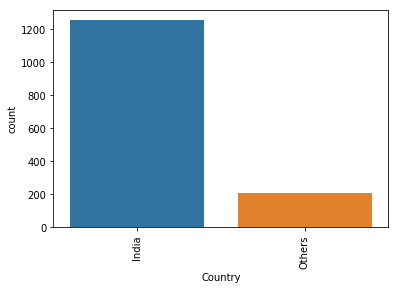

In [36]:
sns.countplot(df.Country)
xticks(rotation = 90)

### Exploring "City" column

In [37]:
df.City.describe()

count         1261
unique          38
top       Gurugram
freq           927
Name: City, dtype: object

In [38]:
df['City'].value_counts()/len(df)*100,2

(Gurugram                      63.493151
 Mumbai                         7.671233
 Jaipur                         3.767123
 New Delhi                      3.356164
 Singapore                      1.917808
 Noida                          1.438356
 Bengaluru                      0.616438
 Sahibzada Ajit Singh Nagar     0.616438
 Alexandria                     0.342466
 Hyderabad                      0.342466
 Mandi Gobindgarh               0.342466
 Chandigarh                     0.205479
 Ludhiana                       0.205479
 Bambolim                       0.205479
 Sepang                         0.136986
 Alwar                          0.136986
 Los Angeles                    0.136986
 Dabolim                        0.068493
 Gurdaspur                      0.068493
 Fatehgarh Sahib                0.068493
 Sarhol                         0.068493
 Kukas                          0.068493
 Ghata                          0.068493
 Seattle                        0.068493
 Kolkata        

In [39]:
df['City'].isnull().sum()

199

In [40]:
df.City2.describe()

count     1410
unique      46
top           
freq       672
Name: City2, dtype: object

In [41]:
df['City2'].value_counts()/len(df)*100,2

(                 46.027397
 GURGAON          31.164384
 ILD TRADE         3.219178
 MUMBAI            2.808219
 NINEX CITY        1.986301
 SINGAPORESGD      1.917808
 JAIPUR            1.643836
 ALANKAR PL        1.575342
 Delhi NCR         0.958904
 BANGALORE         0.616438
 NEW DELHI         0.479452
 GURUGRAM          0.410959
 Jaipur            0.410959
 HIGHWAY KI        0.342466
 FATEHGARH         0.273973
 LUDHIANA          0.205479
 BAMBOLIM          0.136986
 MPP               0.136986
 SEPANG            0.136986
 MOHALI            0.136986
 LONDONUSD         0.136986
 Gurgaon           0.136986
 HYDERABAD         0.136986
 KUALA LUMP        0.068493
 DABOLIM           0.068493
 New Delhi         0.068493
 FARIDABAD         0.068493
 ALWAR             0.068493
 GOBIND GAR        0.068493
 WWW.ICICIP        0.068493
 NOIDA             0.068493
 SALON             0.068493
 KOTA              0.068493
 PAOTA             0.068493
 KHANNA            0.068493
 10GURGAON         0

In [42]:
df[['City', 'City2']]

,City,City2
0,Gurugram,GURGAON
1,Gurugram,
2,Gurugram,
3,Gurugram,GURGAON
4,Gurugram,GURGAON
...,...,...
1465,Gurugram,
1466,Gurugram,
1467,Gurugram,
1468,Gurugram,GURGAON


In [43]:
df['City2'].isnull().sum()

50

#### Replacing 'गुरुग्राम' with Gurugram and Missing values or NaN as Others

In [44]:
df['City'] = df['City'].replace(['गुरुग्राम'], 'Gurugram')
df['City'] = df['City'].replace(np.nan, 'Others')
df = df.drop(['City2'], axis = 1)
df['City'].value_counts()/len(df)*100,2

(Gurugram                      63.561644
 Others                        13.630137
 Mumbai                         7.671233
 Jaipur                         3.767123
 New Delhi                      3.356164
 Singapore                      1.917808
 Noida                          1.438356
 Sahibzada Ajit Singh Nagar     0.616438
 Bengaluru                      0.616438
 Alexandria                     0.342466
 Hyderabad                      0.342466
 Mandi Gobindgarh               0.342466
 Bambolim                       0.205479
 Chandigarh                     0.205479
 Ludhiana                       0.205479
 Alwar                          0.136986
 Sepang                         0.136986
 Los Angeles                    0.136986
 Ghata                          0.068493
 Sarhol                         0.068493
 Gurdaspur                      0.068493
 Kukas                          0.068493
 Dabolim                        0.068493
 Seattle                        0.068493
 Fatehgarh Sahib

In [45]:
df['City'].isnull().sum()

0

### Exploring "State" column

In [46]:
df['State'].value_counts()/len(df)*100,2

(Haryana                             63.835616
 Maharashtra                          7.671233
 Rajasthan                            4.109589
 Delhi                                3.356164
 Punjab                               1.643836
 Uttar Pradesh                        1.506849
 Karnataka                            0.616438
 Goa                                  0.342466
 Virginia                             0.342466
 Telangana                            0.342466
 New York                             0.205479
 Selangor                             0.136986
 California                           0.136986
 Wilayah Persekutuan Kuala Lumpur     0.068493
 हरियाणा                              0.068493
 West Bengal                          0.068493
 Chandigarh                           0.068493
 Washington                           0.068493
 Texas                                0.068493
 Name: State, dtype: float64, 2)

In [47]:
df['State'].isnull().sum()

224

#### Replacing 'हरियाणा' with Haryana and Missing values or NaN as Others

In [48]:
df['State'] = df['State'].replace(['हरियाणा'], 'Haryana')
df['State'] = df['State'].replace(np.nan, 'Others')
df['State'].value_counts()/len(df)*100,2

(Haryana                             63.904110
 Others                              15.342466
 Maharashtra                          7.671233
 Rajasthan                            4.109589
 Delhi                                3.356164
 Punjab                               1.643836
 Uttar Pradesh                        1.506849
 Karnataka                            0.616438
 Goa                                  0.342466
 Virginia                             0.342466
 Telangana                            0.342466
 New York                             0.205479
 Selangor                             0.136986
 California                           0.136986
 Wilayah Persekutuan Kuala Lumpur     0.068493
 West Bengal                          0.068493
 Chandigarh                           0.068493
 Washington                           0.068493
 Texas                                0.068493
 Name: State, dtype: float64, 2)

In [49]:
df['State'].isnull().sum()

0

### Exploring "Locality" column

In [50]:
df['Locality'].value_counts()/len(df)*100,2

(Central Park II        15.410959
 Sector 42               6.232877
 Sohna Road              4.726027
 Gurgaon                 4.452055
 Block S                 2.876712
                          ...    
 Gom Defence Colony      0.068493
 C Scheme                0.068493
 Central Secretariat     0.068493
 Haji Ali                0.068493
 Near Club Cubana        0.068493
 Name: Locality, Length: 185, dtype: float64, 2)

In [51]:
df['Locality'].isnull().sum()

168

In [52]:
#### Replacing Missing values or NaN as Others

In [53]:
df['Locality'] = df['Locality'].replace(np.nan, 'Others')
df['Locality'].value_counts()/len(df)*100,2

(Central Park II                15.410959
 Others                         11.506849
 Sector 42                       6.232877
 Sohna Road                      4.726027
 Gurgaon                         4.452055
                                  ...    
 C Scheme                        0.068493
 Central Secretariat             0.068493
 Haji Ali                        0.068493
 Vishwakarma Industrial Area     0.068493
 Hall Gate                       0.068493
 Name: Locality, Length: 186, dtype: float64, 2)

In [54]:
df['Locality'].isnull().sum()

0

### Checking the count Null values

In [55]:
round(100*(df.isnull().sum()/len(df.index)), 2)

Date                            0.0
Description                     0.0
InternationTransactionAmount    0.0
Category                        0.0
Amount                          0.0
TransactionUserName             0.0
TransactionType                 0.0
IsoCurrency                     0.0
Locality                        0.0
City                            0.0
State                           0.0
Country                         0.0
Description2                    0.0
dtype: float64

### ------------------------------------------------------------------------------------------------------------------------------------------------------------------

#### Exploring "Amount" column

In [56]:
df['Amount'].value_counts()/len(df)*100,2

(-50        1.643836
 -140       1.027397
 -350       0.958904
 -75        0.890411
 -154       0.821918
              ...   
 -42.13     0.068493
 -475.95    0.068493
 -1902      0.068493
 -5400      0.068493
 -2357      0.068493
 Name: Amount, Length: 988, dtype: float64, 2)

#### Since Transaction Amount can not be negative, we are taking absolute value

In [57]:
df['Amount'] = df['Amount'].astype(float)
df['Amount'] = df['Amount'].abs()
print("Min is :", df.Amount.min())
print("Max is :", df.Amount.max())

Min is : 0.01
Max is : 700000.0


In [58]:
df['InternationTransactionAmount'].value_counts()/len(df)*100,2

(0         97.739726
 8          0.068493
 60.89      0.068493
 22.8       0.068493
 84.7       0.068493
 80.8       0.068493
 274        0.068493
 368        0.068493
 105        0.068493
 5          0.068493
 214.4      0.068493
 12.3       0.068493
 489.63     0.068493
 669.74     0.068493
 5.5        0.068493
 778.74     0.068493
 36         0.068493
 13         0.068493
 14.4       0.068493
 99.9       0.068493
 31.83      0.068493
 209        0.068493
 183.95     0.068493
 227        0.068493
 61.77      0.068493
 19.17      0.068493
 238.73     0.068493
 21.2       0.068493
 42         0.068493
 63.56      0.068493
 95         0.068493
 34.4       0.068493
 1.95       0.068493
 65.33      0.068493
 Name: InternationTransactionAmount, dtype: float64, 2)

In [59]:
df['InternationTransactionAmount'] = df['InternationTransactionAmount'].astype(float)
print("Min is :", df.InternationTransactionAmount.min())
print("Max is : ", df.InternationTransactionAmount.max())

Min is : 0.0
Max is :  778.74


#### Exploring "TransactionType" column

In [60]:
df['TransactionType'].value_counts()/len(df)*100,2

(       Domestic    97.739726
   International     2.260274
 Name: TransactionType, dtype: float64, 2)

(array([0, 1]), <a list of 2 Text xticklabel objects>)

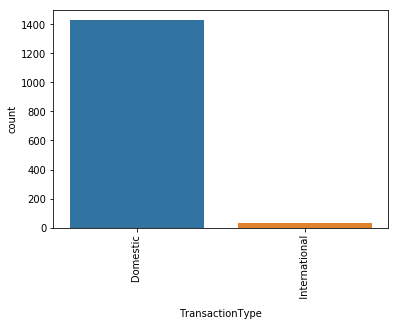

In [61]:
sns.countplot(df.TransactionType)
xticks(rotation = 90)

#### Exploring "IsoCurrency" column

In [62]:
df['IsoCurrency'].value_counts()/len(df)*100,2

(INR    97.739726
 SGD     2.054795
 USD     0.136986
 MYR     0.068493
 Name: IsoCurrency, dtype: float64, 2)

(array([0, 1, 2, 3]), <a list of 4 Text xticklabel objects>)

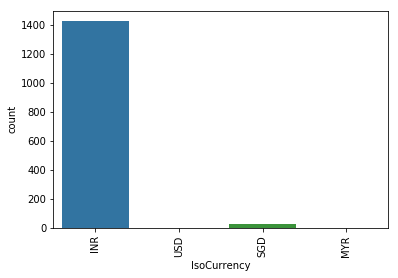

In [63]:
sns.countplot(df.IsoCurrency)
xticks(rotation = 90)

In [64]:
df['IsoCurrency'] = df['IsoCurrency'].replace(['USD', 'MYR'], 'Others')

In [65]:
df['IsoCurrency'].value_counts()/len(df)*100,2

(INR       97.739726
 SGD        2.054795
 Others     0.205479
 Name: IsoCurrency, dtype: float64, 2)

(array([0, 1, 2]), <a list of 3 Text xticklabel objects>)

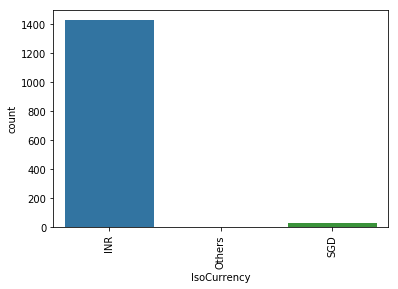

In [66]:
sns.countplot(df.IsoCurrency)
xticks(rotation = 90)

#### Exploring "TransactionUserName" column

In [67]:
df['TransactionUserName'].value_counts()/len(df)*100,2

(         JASJIT KAUR    51.575342
        VIBHORE GOYAL    43.972603
           INDU GOYAL     4.452055
 Name: TransactionUserName, dtype: float64, 2)

(array([0, 1, 2]), <a list of 3 Text xticklabel objects>)

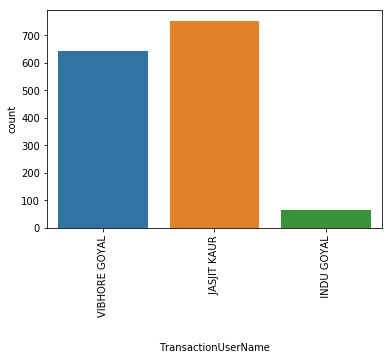

In [68]:
sns.countplot(df.TransactionUserName)
xticks(rotation = 90)

#### Exploring "Category" column

In [69]:
df['Category'].value_counts()/len(df)*100,2

(                                  34.520548
                   Cafe company    10.068493
                     Video game     8.561644
                        Company     3.356164
                    Hotel brand     2.739726
                                     ...    
         Song by Chris Costanzo     0.068493
              Chemical compound     0.068493
  Multi-level marketing company     0.068493
                   Mobile phone     0.068493
                      2018 film     0.068493
 Name: Category, Length: 149, dtype: float64, 2)

In [70]:
df['Category'] = df['Category'].replace(r'^\s*$', np.nan, regex=True)
df['Category'] = df['Category'].replace(np.nan, 'Misc')
df['Category'] = df['Category'].str.strip()

In [71]:
df['Category'].value_counts()/len(df)*100,2

(Misc                   34.520548
 Cafe company           10.068493
 Video game              8.561644
 Company                 3.356164
 Hotel brand             2.739726
                          ...    
 Book by Jean Ferris     0.068493
 Indian actor            0.068493
 Operation               0.068493
 2018 film               0.068493
 Song by Devi            0.068493
 Name: Category, Length: 149, dtype: float64, 2)

#### Exploring "Description2" column

In [72]:
df['Description2'].value_counts()/len(df)*100,2

(THE ROOM                                                               8.356164
 CAFE COFFEE DAY                                                        7.191781
 THE ROOMGURGAON                                                        5.753425
 Planet Needs                                                           2.671233
 AMAZON SELLER SERVICES MUMBAI                                          2.465753
                                                                          ...   
 ORIENT ELECTRIC HOUSE P                                                0.068493
 PRIYANKA WATCH COLLECTIGURGAON                                         0.068493
 IGST-VPS1904603769707-RATE 18.0 -06 (Ref# VT190460069013100000056)     0.068493
 INOX JAIPUR SPACE                                                      0.068493
 WWWW DOMINOS CO IN                                                     0.068493
 Name: Description2, Length: 473, dtype: float64, 2)

### ------------------------------------------------------------------------------------------------------------------------------------------------------------------

In [73]:
categories2 = {'Restaurant company': 'Food',
               'Fast food company': 'Food' ,
               'Cafe company': 'Food',
               'Coffeehouse company': 'Food' ,
               'Fast food restaurant company': 'Food' ,
               'Online food ordering company': 'Food',
               'Pasta': 'Food' ,
               'Food': 'Food',
               'King' : 'Food',
               'Hotel brand': 'Travel',
               'Hotel company':'Travel' ,
               'Hotel chain': 'Travel',
               'Video game' : 'Game',
               '1988 film':'Entertainment',
               'Indian actress':'Entertainment',
               'American television program':'Entertainment',
               'Band':'Entertainment',
               'Cinema company':'Entertainment',
               'American actor':'Entertainment',
               'Canadian model':'Entertainment',
               '2015 film':'Entertainment',
               'Radio station':'Entertainment',
               'Telecommunications company':'Entertainment',
               'Private club':'Entertainment',
               'American actress':'Shopping',
               'Canadian singer-songwriter':'Shopping',
               'Song by Queen':'Shopping',
               'Television series':'Entertainment',
               'American sitcom':'Entertainment',
               'Indian television actor':'Shopping',
               '1993 film':'Entertainment',
               '1976 film':'Entertainment',
               'Song':'Entertainment',
               'Indian film actor':'Shopping',
               'American-German model':'Shopping',
               'American singer-songwriter':'Shopping',
               'Song by 4Joy':'Entertainment',
               '2018 film':'Entertainment',
               '1984 film':'Entertainment',
               '2017 film':'Entertainment',
               '2014 film' :'Entertainment',
               'American film actress':'Shopping',
               '1967 film':'Entertainment',
               'Song by Devi':'Entertainment',
               'Television channel':'Entertainment',
               'Broadcasting service':'Entertainment',
               '1989 film':'Entertainment',
               'Song by Chris Costanzo':'Entertainment',
               'Song by Rhye':'Entertainment',
               'Song by The Botherers':'Entertainment',
               'Television company':'Entertainment',
               '2001 film':'Entertainment', 
               'Indian actor':'Shopping',
               
               'Electronics retail company': 'Shopping',
               'Ridesharing company': 'Travel',
               'Company': 'Shopping',
               'Health care company': 'Health',
               'E-commerce company': 'Shopping',
               'Retail company': 'Shopping',
               'Corporation': 'Shopping',
               'Insurance company': 'Health',
               'Department store company': 'Shopping',
               'Clothing retail company': 'Shopping',
               'Entertainment company': 'Shopping',
               'Hospitality company': 'Health',
               'Fashion company': 'Shopping',
               'Railway company': 'Travel',
               'Hardware store company': 'Shopping',
               'Multinational conglomerate company': 'Shopping',
               'Production company': 'Shopping',
               'Cosmetics company': 'Shopping',
               'Mobile network provider company': 'Shopping',
               'VFX company': 'Entertainment',
               'Retail chain company': 'Shopping',
               'Multi-level marketing company': 'Shopping',
               'Technology company': 'Shopping',
               'Supermarket company': 'Shopping',
               'State-owned enterprise': 'Shopping',
               
               'Novel by Jules Verne': 'Books',
               'Novel by Jane Austen': 'Books',
               'Poem by Tulsidas': 'Books',
               'Book by Alan Beaulieu': 'Books',
               'Novel by Tamsyn Muir': 'Books',
               'Book by Eric Carle': 'Books',
               'Book by A. C. Bhaktivedanta Swami Prabhupada': 'Books',
               'Book by Jean Ferris':'Books',
               'Book by Tavleen Singh': 'Books',
               'Book by Rudyard Kipling': 'Books',
               'Book by Thomas Sowell': 'Books',
               'Novel by Jonathan Maberry': 'Books',
               'Novel by Lewis Carroll': 'Books',
               'International airline' : 'Travel',
               'Arline' : 'Travel'
              }


In [74]:
df['Categorization'] = df['Category'].map(categories2)

In [75]:
df['Categorization'].describe()

count      780
unique       7
top       Food
freq       228
Name: Categorization, dtype: object

In [76]:
df['Categorization'].value_counts()/len(df)*100,2

(Food             15.616438
 Shopping         13.904110
 Game              8.561644
 Entertainment     7.602740
 Travel            4.520548
 Books             2.739726
 Health            0.479452
 Name: Categorization, dtype: float64, 2)

(array([0, 1, 2, 3, 4, 5, 6]), <a list of 7 Text xticklabel objects>)

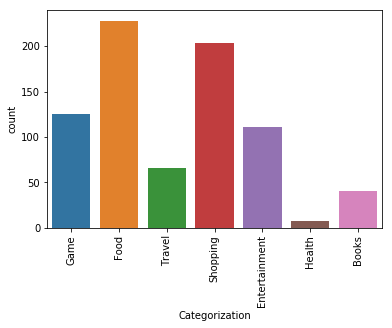

In [77]:
sns.countplot(df.Categorization)
xticks(rotation = 90)

In [78]:
df['Categorization'].isnull().sum()

680

In [79]:
df['Categorization'] = df['Categorization'].replace(np.nan, 'Misc')

(array([0, 1, 2, 3, 4, 5, 6, 7]), <a list of 8 Text xticklabel objects>)

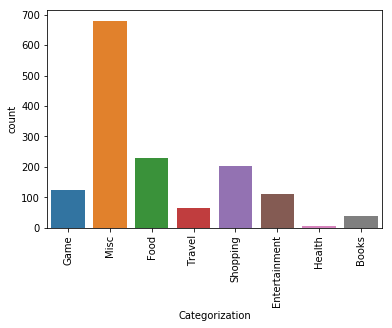

In [80]:
sns.countplot(df.Categorization)
xticks(rotation = 90)

In [81]:
df["Date"]= pd.to_datetime(df["Date"])

In [82]:
def fix_date(series, patterns=['%Y%m%d', '%d%m%Y', '%d/%m/%Y', '%d-%b-%Y']):
    datetimes = []
    for pat in patterns:
        datetimes.append(pd.to_datetime(series, format=pat, errors='coerce'))
    return pd.concat(datetimes, axis=1).ffill(axis=1).iloc[:, -1]

df['Date'] = fix_date(df['Date'])

In [83]:
df['Day'] = df['Date'].dt.day
df['Month'] = df['Date'].dt.month
df['Year'] = df['Date'].dt.year

In [84]:
df.head(25)

,Date,Description,InternationTransactionAmount,Category,Amount,TransactionUserName,TransactionType,IsoCurrency,Locality,City,State,Country,Description2,Categorization,Day,Month,Year
0,2019-12-12,THE ROOM GURGAON ...,0.0,Video game,127.00,VIBHORE GOYAL,Domestic,INR,Central Park II,Gurugram,Haryana,India,THE ROOM,Game,12,12,2019
1,2019-12-12,CUT AND STYLEGURGAON ...,0.0,Occupation,499.00,JASJIT KAUR,Domestic,INR,Sector 4,Gurugram,Haryana,India,CUT AND STYLEGURGAON,Misc,12,12,2019
2,2019-12-12,MUMUSOGURGAON ...,0.0,Misc,388.00,JASJIT KAUR,Domestic,INR,Sector 49,Gurugram,Haryana,India,MUMUSOGURGAON,Misc,12,12,2019
3,2019-12-12,THE ROOM GURGAON ...,0.0,Video game,108.00,VIBHORE GOYAL,Domestic,INR,Central Park II,Gurugram,Haryana,India,THE ROOM,Game,12,12,2019
4,2019-12-12,THE ROOM GURGAON ...,0.0,Video game,50.00,VIBHORE GOYAL,Domestic,INR,Central Park II,Gurugram,Haryana,India,THE ROOM,Game,12,12,2019
5,2019-12-13,JAIPUR SPACEJAIPUR ...,0.0,City in India,360.00,JASJIT KAUR,Domestic,INR,Sector 9,Jaipur,Rajasthan,India,JAIPUR SPACEJAIPUR,Misc,13,12,2019
6,2019-12-13,CAFE COFFEE DAYHIGHWAY KI ...,0.0,Cafe company,286.00,JASJIT KAUR,Domestic,INR,Others,Others,Others,Others,CAFE COFFEE DAYHIGHWAY KI,Food,13,12,2019
7,2019-12-14,CAFE COFFEE DAYALANKAR PL ...,0.0,Cafe company,786.00,JASJIT KAUR,Domestic,INR,Others,Others,Others,Others,CAFE COFFEE DAYALANKAR PL,Food,14,12,2019
8,2019-12-15,LIFE STYLE INTERNATIONAJAIPUR ...,0.0,Misc,1698.00,VIBHORE GOYAL,Domestic,INR,Durgadas Colony,Jaipur,Rajasthan,India,LIFE STYLE INTERNATIONAJAIPUR,Misc,15,12,2019
9,2019-12-15,NEW U 47 JAIPUR ...,0.0,New York City borough,1890.00,VIBHORE GOYAL,Domestic,INR,Jaipur,Jaipur,Rajasthan,India,NEW U 47,Misc,15,12,2019


In [85]:
df['Day'].isnull().sum()

0

In [86]:
df['Month'].isnull().sum()

0

In [87]:
df['Year'].isnull().sum()

0

In [88]:
df.head(10)

,Date,Description,InternationTransactionAmount,Category,Amount,TransactionUserName,TransactionType,IsoCurrency,Locality,City,State,Country,Description2,Categorization,Day,Month,Year
0,2019-12-12,THE ROOM GURGAON ...,0.0,Video game,127.0,VIBHORE GOYAL,Domestic,INR,Central Park II,Gurugram,Haryana,India,THE ROOM,Game,12,12,2019
1,2019-12-12,CUT AND STYLEGURGAON ...,0.0,Occupation,499.0,JASJIT KAUR,Domestic,INR,Sector 4,Gurugram,Haryana,India,CUT AND STYLEGURGAON,Misc,12,12,2019
2,2019-12-12,MUMUSOGURGAON ...,0.0,Misc,388.0,JASJIT KAUR,Domestic,INR,Sector 49,Gurugram,Haryana,India,MUMUSOGURGAON,Misc,12,12,2019
3,2019-12-12,THE ROOM GURGAON ...,0.0,Video game,108.0,VIBHORE GOYAL,Domestic,INR,Central Park II,Gurugram,Haryana,India,THE ROOM,Game,12,12,2019
4,2019-12-12,THE ROOM GURGAON ...,0.0,Video game,50.0,VIBHORE GOYAL,Domestic,INR,Central Park II,Gurugram,Haryana,India,THE ROOM,Game,12,12,2019
5,2019-12-13,JAIPUR SPACEJAIPUR ...,0.0,City in India,360.0,JASJIT KAUR,Domestic,INR,Sector 9,Jaipur,Rajasthan,India,JAIPUR SPACEJAIPUR,Misc,13,12,2019
6,2019-12-13,CAFE COFFEE DAYHIGHWAY KI ...,0.0,Cafe company,286.0,JASJIT KAUR,Domestic,INR,Others,Others,Others,Others,CAFE COFFEE DAYHIGHWAY KI,Food,13,12,2019
7,2019-12-14,CAFE COFFEE DAYALANKAR PL ...,0.0,Cafe company,786.0,JASJIT KAUR,Domestic,INR,Others,Others,Others,Others,CAFE COFFEE DAYALANKAR PL,Food,14,12,2019
8,2019-12-15,LIFE STYLE INTERNATIONAJAIPUR ...,0.0,Misc,1698.0,VIBHORE GOYAL,Domestic,INR,Durgadas Colony,Jaipur,Rajasthan,India,LIFE STYLE INTERNATIONAJAIPUR,Misc,15,12,2019
9,2019-12-15,NEW U 47 JAIPUR ...,0.0,New York City borough,1890.0,VIBHORE GOYAL,Domestic,INR,Jaipur,Jaipur,Rajasthan,India,NEW U 47,Misc,15,12,2019


In [89]:
df.to_csv('CleanData.csv')

### Newly added columns in the datset : 
 1. Description2 - Rwemoved the City name from the "Description" column
 2. Categorization - Divided the rows into various following categories:
    i.   Food
    ii.  Shopping
    iii. Game
    iv.  Entertainment
    v.   Travel
    vi. Books
 3. Day - Extracted from "Date" Column
 4. Month - Extracted from "Date" Column
 5. Year - Extracted from "Date" Column
 
We can use the column, "Categorization" to 

## Queries

In [90]:
df.groupby('Categorization')['Amount'].sum()

Categorization
Books              91618.54
Entertainment     165081.66
Food               88931.51
Game              160999.32
Health            205222.91
Misc             5236132.23
Shopping          972760.18
Travel            149000.82
Name: Amount, dtype: float64

In [91]:
import datetime
today = datetime.datetime.now()

## What was my food bill last month?

In [92]:
# What was my food bill last month?

df[(df.Categorization == 'Food') & (df.Month == today.month-1 if today.month > 1 else 12) & (df.Year == today.year)][['Amount' , 'InternationTransactionAmount']].sum()

Amount                          0.0
InternationTransactionAmount    0.0
dtype: float64

### Since there were no data for ther month of 2021, the amount came out to be 0.

#### What was my food bill for 12/2019 ?

In [93]:
df[(df.Categorization == 'Food') & (df.Month == 12) & (df.Year == 2019)][['Amount' , 'InternationTransactionAmount']].sum()

Amount                          2825.62
InternationTransactionAmount       0.00
dtype: float64

## Compare my monthly travel over past three month

In [94]:
print("Travel Expense for the month of" , today.month-1 if today.month > 1 else 12," Year ", today.year, "is :\n")
print(df[(df.Categorization == 'Travel') & (df.Year == today.year) & (df.Month == (today.month-1 if today.month > 1 else 12))][['Amount' , 'InternationTransactionAmount']].sum())
print("\n")
print("Travel Expense for the month of" , today.month-2 if today.month > 1 else 12," Year ", today.year, "is :\n")
print(df[(df.Categorization == 'Travel') & (df.Year == today.year) & (df.Month == (today.month-2 if today.month > 1 else 12))][['Amount' , 'InternationTransactionAmount']].sum())
print("\n")
print("Travel Expense for the month of" , today.month-3 if today.month > 1 else 12," Year ", today.year, "is :\n")
print(df[(df.Categorization == 'Travel') & (df.Year == today.year) & (df.Month == (today.month-3 if today.month > 1 else 12))][['Amount' , 'InternationTransactionAmount']].sum())


Travel Expense for the month of 3  Year  2021 is :

Amount                          0.0
InternationTransactionAmount    0.0
dtype: float64


Travel Expense for the month of 2  Year  2021 is :

Amount                          0.0
InternationTransactionAmount    0.0
dtype: float64


Travel Expense for the month of 1  Year  2021 is :

Amount                          0.0
InternationTransactionAmount    0.0
dtype: float64


## Compare my monthly travel over past first three month of 2020

In [95]:
print("Travel Expense for the month of" , today.month-1 if today.month > 1 else 12," Year ", today.year-1, "is :\n")
print(df[(df.Categorization == 'Travel') & (df.Year == today.year-1) & (df.Month == (today.month-1 if today.month > 1 else 12))][['Amount' , 'InternationTransactionAmount']].sum())
print("\n")
print("Travel Expense for the month of" , today.month-2 if today.month > 1 else 12," Year ", today.year-1, "is :\n")
print(df[(df.Categorization == 'Travel') & (df.Year == today.year-1) & (df.Month == (today.month-2 if today.month > 1 else 12))][['Amount' , 'InternationTransactionAmount']].sum())
print("\n")
print("Travel Expense for the month of" , today.month-3 if today.month > 1 else 12," Year ", today.year-1, "is :\n")
print(df[(df.Categorization == 'Travel') & (df.Year == today.year-1) & (df.Month == (today.month-3 if today.month > 1 else 12))][['Amount' , 'InternationTransactionAmount']].sum())


Travel Expense for the month of 3  Year  2020 is :

Amount                          2211.66
InternationTransactionAmount       0.00
dtype: float64


Travel Expense for the month of 2  Year  2020 is :

Amount                          30905.96
InternationTransactionAmount        0.00
dtype: float64


Travel Expense for the month of 1  Year  2020 is :

Amount                          4959.27
InternationTransactionAmount       0.00
dtype: float64


### Am I an impulsive shopper?

In [97]:
print("Shopping Cumulative Amount: " )
df[(df.Categorization == 'Shopping')][['Amount' , 'InternationTransactionAmount']].sum()

Shopping Cumulative Amount: 


Amount                          972760.18
InternationTransactionAmount       868.53
dtype: float64

In [98]:
print("Shopping Bill Expense for" , " Year ", today.year, "is :\n")
print(df[(df.Categorization == 'Shopping') & (df.Year == today.year)][['Amount' , 'InternationTransactionAmount']].sum())
print("\n")
print("Shopping Bill Expense for" , " Year ",today.year-1, "is :\n")
print(df[(df.Categorization == 'Shopping') & (df.Year == today.year-1)][['Amount' , 'InternationTransactionAmount']].sum())
print("\n")
print("Shopping Bill Expense for" , " Year ", today.year-2, "is :\n")
print(df[(df.Categorization == 'Shopping') & (df.Year == today.year-2)][['Amount' , 'InternationTransactionAmount']].sum())
print("\n")
print("Shopping Bill Expense for" , " Year ", today.year-3, "is :\n")
print(df[(df.Categorization == 'Shopping') & (df.Year == today.year-3)][['Amount' , 'InternationTransactionAmount']].sum())

print("----------------------------------------\n")
print("Shopping Cumulative Amount: " )
df[(df.Categorization == 'Shopping')][['Amount' , 'InternationTransactionAmount']].sum()

Shopping Bill Expense for  Year  2021 is :

Amount                          0.0
InternationTransactionAmount    0.0
dtype: float64


Shopping Bill Expense for  Year  2020 is :

Amount                          338664.81
InternationTransactionAmount         0.00
dtype: float64


Shopping Bill Expense for  Year  2019 is :

Amount                          631562.51
InternationTransactionAmount       832.53
dtype: float64


Shopping Bill Expense for  Year  2018 is :

Amount                          2532.86
InternationTransactionAmount      36.00
dtype: float64
----------------------------------------

Shopping Cumulative Amount: 


Amount                          972760.18
InternationTransactionAmount       868.53
dtype: float64

# Now you decide based whether the indidual is impulsive shopper or not. 

# ------------------------------------------------Thank You--------------------------------------------------